## This program predict the likelihood of a candidate joining the company.

## Import the Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Load the data

In [2]:
#storing the data into a dataframe
df = pd.read_csv("hr_data.csv")

#print the first 5 rows of data
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34.0,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34.0,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27.0,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34.0,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34.0,Joined


## Get the number of rows and cols:

In [3]:
df.shape

(8995, 18)

## Get the column data types:

In [4]:
df.dtypes

SLNO                             int64
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer         int64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                            float64
Status                          object
dtype: object

## Get a count of the empty values in each column:

In [5]:
df.isna().sum()

SLNO                            0
Candidate Ref                   0
DOJ Extended                    0
Duration to accept offer        0
Notice period                   0
Offered band                   13
Pecent hike expected in CTC     0
Percent hike offered in CTC     0
Percent difference CTC          0
Joining Bonus                   0
Candidate relocate actual       0
Gender                          0
Candidate Source                0
Rex in Yrs                      0
LOB                             0
Location                        0
Age                            15
Status                          0
dtype: int64

In [6]:
#check for any missing / null value in data
df.isnull().values.any()

True

In [7]:
#drop the row with the missing values
df.dropna(how="any",inplace = True)
df.shape

(8968, 18)

In [8]:
df.isna().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [9]:
##Checking for missing and null values:
df.isnull().values.any()

False

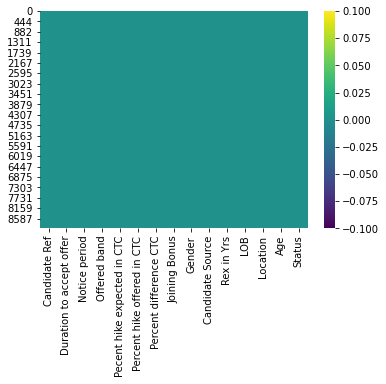

In [63]:
sns.heatmap(df.isnull(),cmap='viridis');

## View some statistics of the data

In [10]:
df.describe()

,SLNO,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8968.000000,8.968000e+03,8968.000000,8968.000000,8968.000000,8968.000000,8968.000000,8968.000000,8968.000000
mean,5987.299955,2.844900e+06,21.424509,39.304750,43.920653,40.679354,-1.600166,4.236396,29.912690
std,3365.839810,4.859258e+05,25.805543,22.203877,29.770737,35.994517,19.535669,2.546081,4.097243
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3229.750000,2.386855e+06,3.000000,30.000000,27.300000,22.220000,-8.367500,3.000000,27.000000
50%,5993.500000,2.807608e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,8750.250000,3.300084e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


In [11]:
##Get the count of the number of employees that reject to join the company:
df['Status'].value_counts()


Joined        7290
Not Joined    1678
Name: Status, dtype: int64

In [12]:
##Hide the warnings
import warnings
warnings.filterwarnings('ignore')

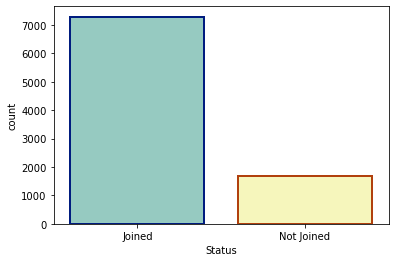

In [13]:
##Visualize the number of employees who joined and not joined:

sns.countplot(df['Status'],edgecolor=sns.color_palette('dark',3),linewidth=2,palette="Set3");


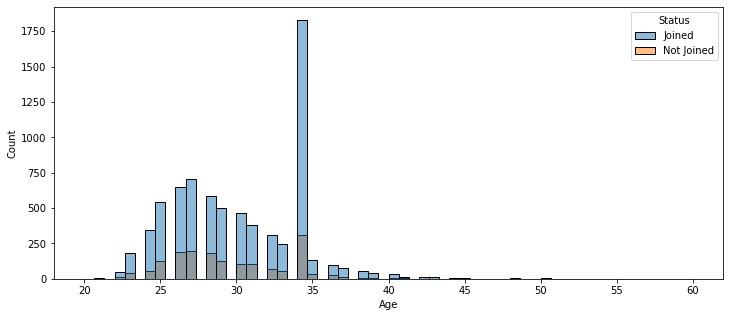

In [14]:
##the number of employees that left and stayed by age:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,5))
sns.histplot(x='Age',hue='Status',data=df);

In [15]:
##We can say that the age group of 34 having maximum chances to accept the offer.

## Transforming the data

In [16]:
##Non numeric into numerical cols

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [17]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,0,2,1,14,1,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34.0,0
1,1,7,0,18,1,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34.0,0
2,2,8,0,3,2,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27.0,0
3,3,16,0,26,1,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34.0,0
4,4,17,1,1,6,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34.0,0


In [18]:
##Remove some useless columns joining bon,doj ex,candidate relo,gender
df = df.drop('SLNO',axis=1)
df = df.drop('DOJ Extended',axis=1)
df = df.drop('Candidate relocate actual',axis=1)



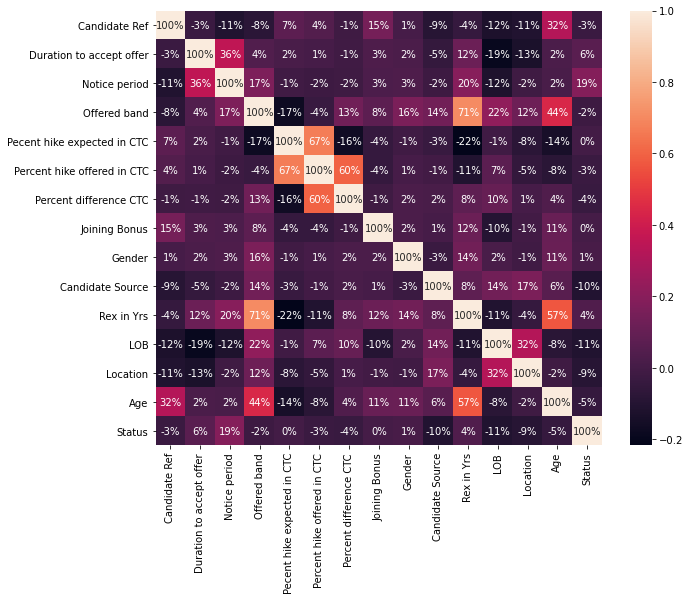

In [19]:
##Visualize the correlation:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.0%');

In [20]:
df.head()

,Candidate Ref,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2,14,1,2,-20.79,13.16,42.86,0,0,0,7,4,8,34.0,0
1,7,18,1,2,50.00,320.00,180.00,0,1,2,8,7,2,34.0,0
2,8,3,2,2,42.84,42.84,0.00,0,1,0,4,7,8,27.0,0
3,16,26,1,2,42.84,42.84,0.00,0,1,2,4,7,8,34.0,0
4,17,1,6,2,42.59,42.59,0.00,0,1,2,6,7,8,34.0,0


## Split the Data

In [21]:
X = df.drop(['Candidate Ref','Status'],axis=1)
Y = df['Status']

In [22]:
##Split the data into 75% in training and 25% in Testing

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [23]:
##Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Accuracy check

In [40]:
##Get the accuracy on training Data set

forest.score(X_train,Y_train)

0.9756170086232531

In [41]:
##Show the confusion matrix and accuracy score for the model on the test data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model testing accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[1773   64]
 [ 354   51]]
Model testing accuracy = 0.8135593220338984


In [44]:
y_pred = forest.predict(X_test)
forest.score(X_test,Y_test)

0.8135593220338984

In [47]:
df_decision = pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred})

In [48]:
df_decision.head()

,Actual Value,Predicted Value
4635,0,0
7651,0,0
6112,0,0
6991,0,0
1199,0,0


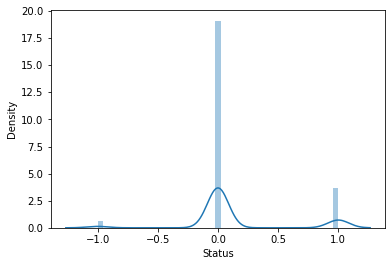

In [49]:
sns.distplot(Y_test-y_pred);

In [50]:
#we can check how many Decision tree we do have in our Random Forest

forest.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=441365315),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=192771779),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1491434855),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [51]:
len(forest.estimators_)

10

## Visualizing the Tree

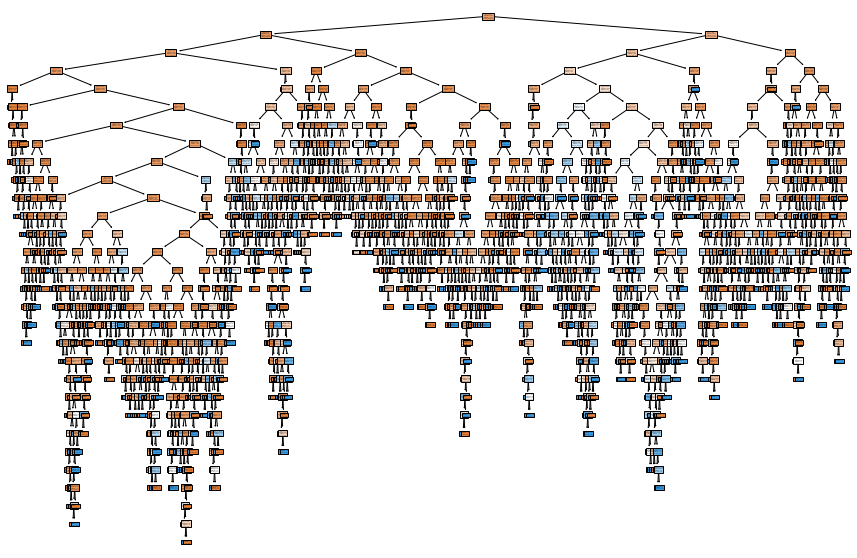

In [62]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(forest.estimators_[5],filled = True);